<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2010.jpg)


# **Python para Machine Learning** - Parte 10

Nesse notebook vamos ver:
- Árvores de Decisão
- Classificação por Combinação de Votos
- Bagging
- Random Forest
- Exercícios
- Links Úteis



---



### Preparação dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


In [2]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)

In [35]:
#Fazendo a Divisão em Teste e Treinamento
Xtreino, Xteste, Ytreino, Yteste = train_test_split(ads.loc[:, ['Age', 'EstimatedSalary']], 
                                                    ads['Purchased'], 
                                                    test_size = 0.25)

In [23]:
def GraficosDeRegiao(modelo, nome = ''):
    plt.figure(figsize = (15, 7))

    plt.subplot(1, 2, 1) 
    plot_decision_regions(Xtreino.values, Ytreino.values, clf = modelo, legend = 1)

    plt.xlabel('Idade')
    plt.ylabel('Salário Estimado')
    plt.title('Treino' + nome) 

    plt.subplot(1, 2, 2) 
    plot_decision_regions(Xteste.values, Yteste.values, clf = modelo, legend = 1)
    plt.xlabel('Idade')
    plt.ylabel('Salário Estimado')
    plt.title('Teste' + nome ) 

    plt.show()

## **Árvore de Decisão**

In [36]:
#Treinando o Modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier(max_depth = 2)
arvore.fit(Xtreino, Ytreino)

#Verificando o ACC
from sklearn.metrics import accuracy_score 

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)
acc_treino = accuracy_score(preditos_treino, Ytreino)
acc_teste = accuracy_score(preditos_teste, Yteste)
    
print('A Acurácia de TREINO foi: {:.2f}%'.format(100*acc_treino))
print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TREINO foi: 92.00%
A Acurácia de TESTE foi:  90.00%


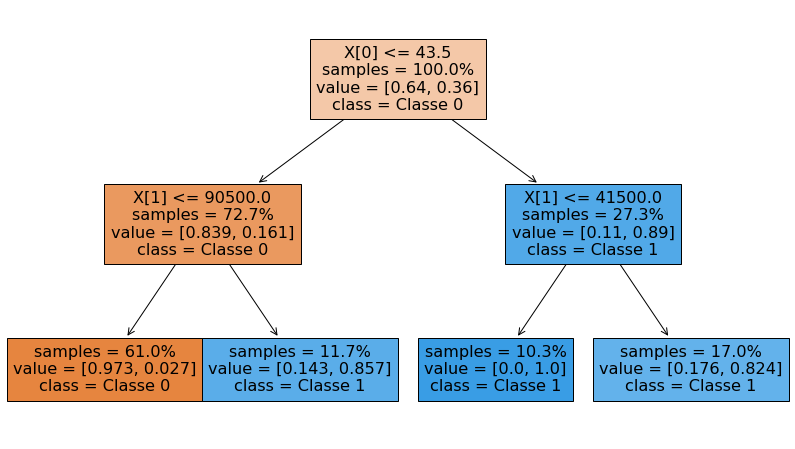

In [27]:
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = True, impurity = False,
          class_names = ['Classe 0', 'Classe 1'])#, feature_names = Xtreino.columns)
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


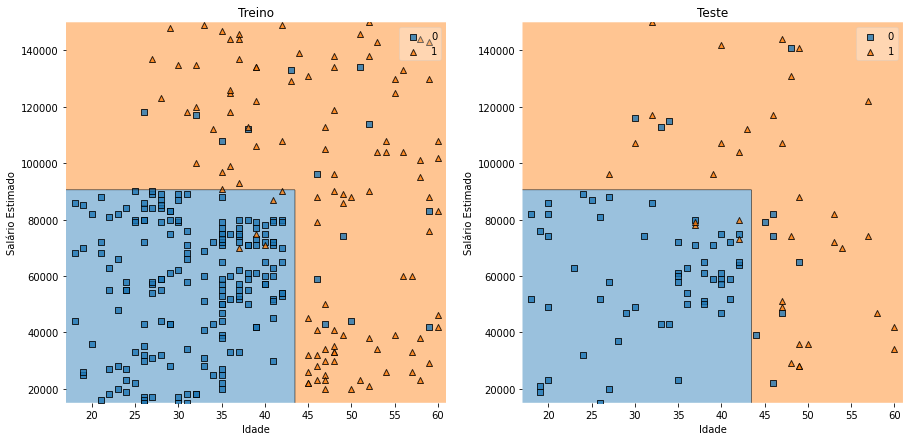

In [28]:
GraficosDeRegiao(arvore)

## **Combinação de Modelos por Voto**

In [29]:
#Fazendo a Divisão em Teste e Treinamento
from sklearn.model_selection import train_test_split
Xtreino, Xteste, Ytreino, Yteste = train_test_split(ads.loc[:, ['Age', 'EstimatedSalary']], 
                                                    ads['Purchased'], 
                                                    test_size = 0.25)

In [37]:
#Padronizando os Dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtreino = sc.fit_transform(Xtreino)
Xteste = sc.transform(Xteste)

Xtreino = pd.DataFrame(Xtreino)
Xteste = pd.DataFrame(Xteste)

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 13)
arvore = DecisionTreeClassifier(max_depth = 2)

voto = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)])
 

In [39]:
reglog.fit(Xtreino, Ytreino)
arvore.fit(Xtreino, Ytreino)
knn.fit(Xtreino, Ytreino)

voto.fit(Xtreino, Ytreino)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                              DecisionTreeC

In [40]:
from sklearn.metrics import accuracy_score 

preditos_reglog = reglog.predict(Xteste)
preditos_knn = knn.predict(Xteste)
preditos_arvore = arvore.predict(Xteste)
preditos_voto = voto.predict(Xteste)

acc_reglog = accuracy_score(preditos_reglog, Yteste)
acc_knn = accuracy_score(preditos_knn, Yteste)
acc_arvore = accuracy_score(preditos_arvore, Yteste)
acc_voto = accuracy_score(preditos_voto, Yteste)
    
print('A Acurácia da Regressão Logística foi: {:.2f}%'.format(100*acc_reglog))
print('A Acurácia do KNN foi: {:.2f}%'.format(100*acc_knn))
print('A Acurácia da Árvore de Decisão foi: {:.2f}%'.format(100*acc_arvore))
print('\nA Acurácia da Combinação por Votos foi: {:.2f}%'.format(100*acc_voto))

A Acurácia da Regressão Logística foi: 82.00%
A Acurácia do KNN foi: 87.00%
A Acurácia da Árvore de Decisão foi: 90.00%

A Acurácia da Combinação por Votos foi: 87.00%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


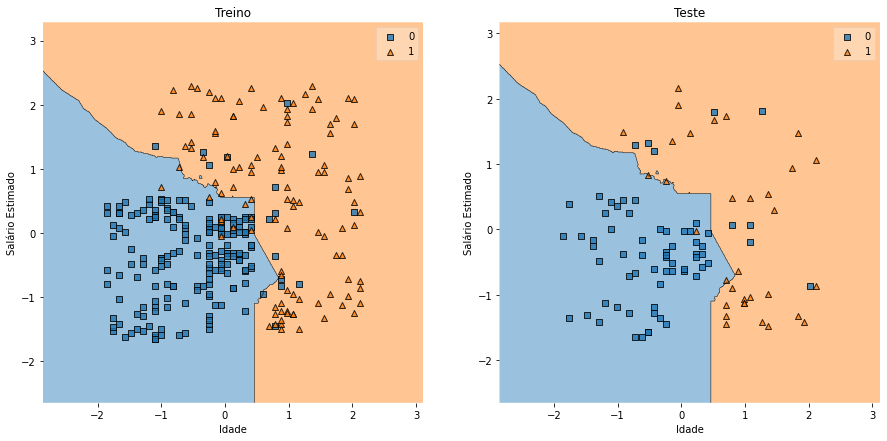

In [41]:
GraficosDeRegiao(voto)



---



## **Bagging de Modelos**

In [42]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(n_estimators = 100) 
bag.fit(Xtreino, Ytreino)

preditos_bag = bag.predict(Xteste)

acc_bag = accuracy_score(preditos_bag, Yteste) 
    
print('A Acurácia do Bagging foi: {:.2f}%'.format(100*acc_bag))

A Acurácia do Bagging foi: 88.00%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


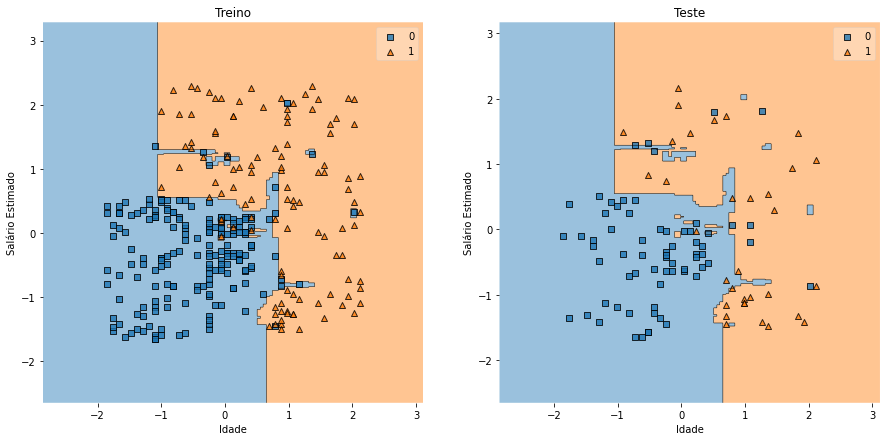

In [43]:
GraficosDeRegiao(bag)



---



## **Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 
rf.fit(Xtreino, Ytreino)

preditos_rf = rf.predict(Xteste)

acc_rf = accuracy_score(preditos_rf, Yteste) 
    
print('A Acurácia do RF foi: {:.2f}%'.format(100*acc_rf))

A Acurácia do RF foi: 87.00%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


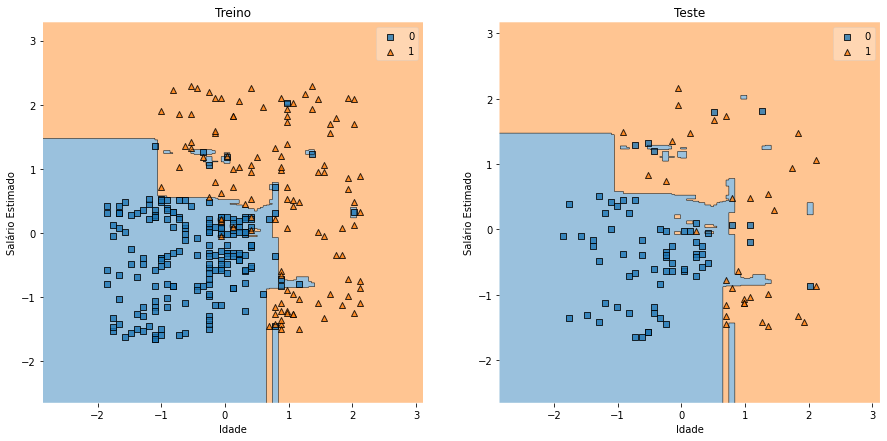

In [45]:
GraficosDeRegiao(rf)



---



### Geração de Dados Artificiais: Formato de Luas

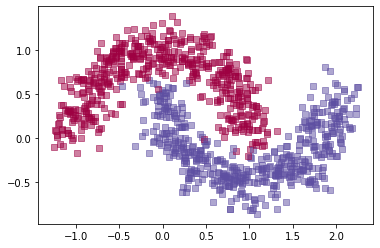

In [46]:
n = 1000
bagunca = 0.15

from sklearn import datasets
X, Y = datasets.make_moons(n_samples = n, noise = bagunca)

plt.scatter(X[:, 0], X[:, 1], c = Y, marker = 's', alpha = 0.5, cmap = 'Spectral')
plt.show()

Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, Y, test_size = 0.2)



---



## **Exercício 15**

Encontre, utilizando validação cruzada, qual é a melhor escolha do parâmetro **max_depth** na árvore de decisão e random forest. 

## **Exercício 16**

Faça gráficos de região em uma amostra de teste para todos os classificadores que você conhece nos dados **ads**.

## **Exercício 17**

Utilizando validação cruzada, identifique qual o melhor classificador dentre os que você conhece para os dados **ads**.

## **Exercício 18**

Repita o exercício 17 para os dados gerados artificilmente pela função **make_moons**. Utilize ``n_samples = 5000`` e ``noise = 0.35``

## **Exercício 19**

Ainda nos dados do exercicio 18, faça um gráfico do resultado do Bagging baseado no número de réplicas bootstrap utilizadas, varie de 1 a 100. 

## **Links Úteis**

- [Experimento Wisdom of the Crowd](https://www.youtube.com/watch?v=iOucwX7Z1HU)
- [Documentação das Árvores de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Documentação do Classificador via Votos](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=voting#sklearn.ensemble.VotingClassifier)
- [Documentação do Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=bagging#sklearn.ensemble.BaggingClassifier)
- [Documentação do Random Forest ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)